In [16]:
pip install --upgrade seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install --upgrade wordcloud 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# 1. Introduction

# 2. Understanding the Data and the structure

To understand the data better, we should first display the initial rows of the dataset to visualize its structure.

In [19]:
file_path = './data/combined-spam-datasets.csv'
data = pd.read_csv(file_path)
data.head()

,Category,Text
0,ham,Go until jurong point crazy.. Available only ...
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Nah I don't think he goes to usf he lives aro...


To understand the data in hand also we check for Null values in the data.

In [20]:
# Check for missing values
missing_values = data.isnull().sum()

# Get a summary of the dataset
data_summary = data.describe(include='all')

missing_values, data_summary


(Category    718
 Text          0
 dtype: int64,
        Category        Text
 count      9038        9756
 unique        6        6552
 top         ham  <REDACTED>
 freq       4830        2566)

#### Missing Values:
##### Category: 718 missing values.
##### Text: No missing values.

#### Data Summary:
##### Category: 6 unique values with "ham" being the most frequent (4830 occurrences).
##### Text: 6552 unique texts with the most frequent text "< REDACTED >" appearing 2566 times.

# 3. Cleaning the Data

We need to address the missing values in the data. There are two ways to go about this:

1. Remove Rows with Missing Values for Category.
2. Fill Out the Rows with Missing Values Manually.

For simplicity, we decided to remove the rows with missing values.

In [21]:
data_cleaned = data.dropna(subset=['Category']).copy()

# Ensure 'Category' is treated as a categorical variable using .astype
data_cleaned.loc[:, 'Category'] = data_cleaned['Category'].astype('category')

print(data_cleaned)

     Category                                               Text
0         ham  Go until jurong point  crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf  he lives aro...
...       ...                                                ...
9751   notifs                                         <REDACTED>
9752     spam  Kumita habang nanonood ng YouTube, kumita ng 5...
9753      ads  Hi SCOTT! Now's your chance to join Park Hyung...
9754     spam  CC6 Deposit Promo! Free 277 PHP on 100 PHP Dep...
9755     spam  Make money while watching YouTube, earn 500P p...

[9038 rows x 2 columns]


# 4. Univariate Analysis

Now let's explore the distribution of the "Category" variable and examine some basic statistics for the "Text" column.

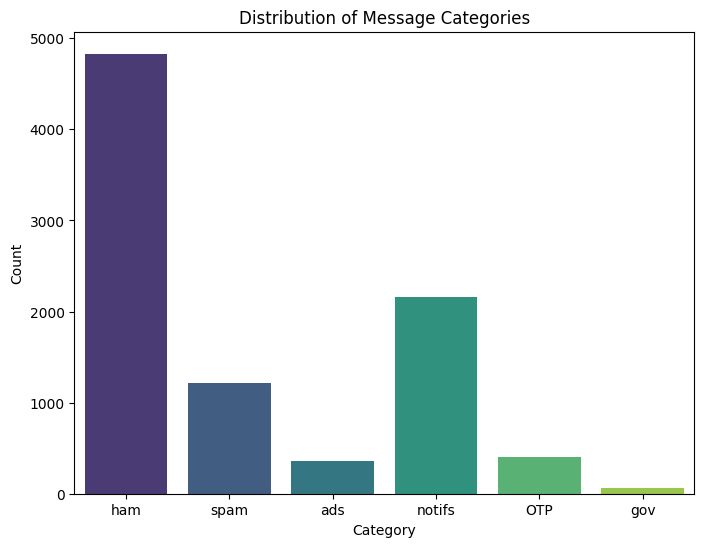

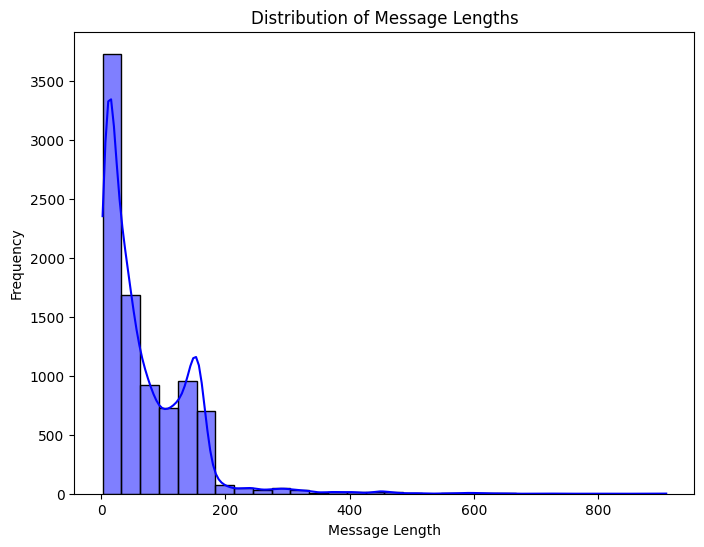

(Category
 ham       4830
 notifs    2162
 spam      1218
 OTP        406
 ads        356
 gov         66
 Name: count, dtype: int64,
 count    9038.000000
 mean       68.909825
 std        71.606842
 min         2.000000
 25%        10.000000
 50%        44.000000
 75%       112.000000
 max       910.000000
 Name: Text_length, dtype: float64)

In [22]:
# Univariate Analysis: Distribution of "Category"
category_counts = data_cleaned['Category'].value_counts()

# Plot the distribution of categories
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=data_cleaned, hue='Category', palette='viridis', legend=False)
plt.title('Distribution of Message Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Univariate Analysis: Length of messages
data_cleaned.loc[:, 'Text_length'] = data_cleaned['Text'].apply(len)
text_length_summary = data_cleaned['Text_length'].describe()

# Plot the distribution of text lengths
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['Text_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

category_counts, text_length_summary

### Univariate Analysis Results
Distribution of Message Categories

ham: 4830

notifs: 2162

spam: 1218

OTP: 406

ads: 356

gov: 66

### Distribution of Message Lengths
Count: 9038 messages

Mean: 68.91 characters

Standard Deviation: 71.61 characters

Min: 2 characters

25th Percentile: 10 characters

50th Percentile (Median): 44 characters

75th Percentile: 112 characters

Max: 910 characters

# 5.  Bivariate Analysis

Now let us explore more on the relationship between the two variables "Category" and "Text"

1. We can analyse this by looking at the Word frequency in spam vs. ham messages.

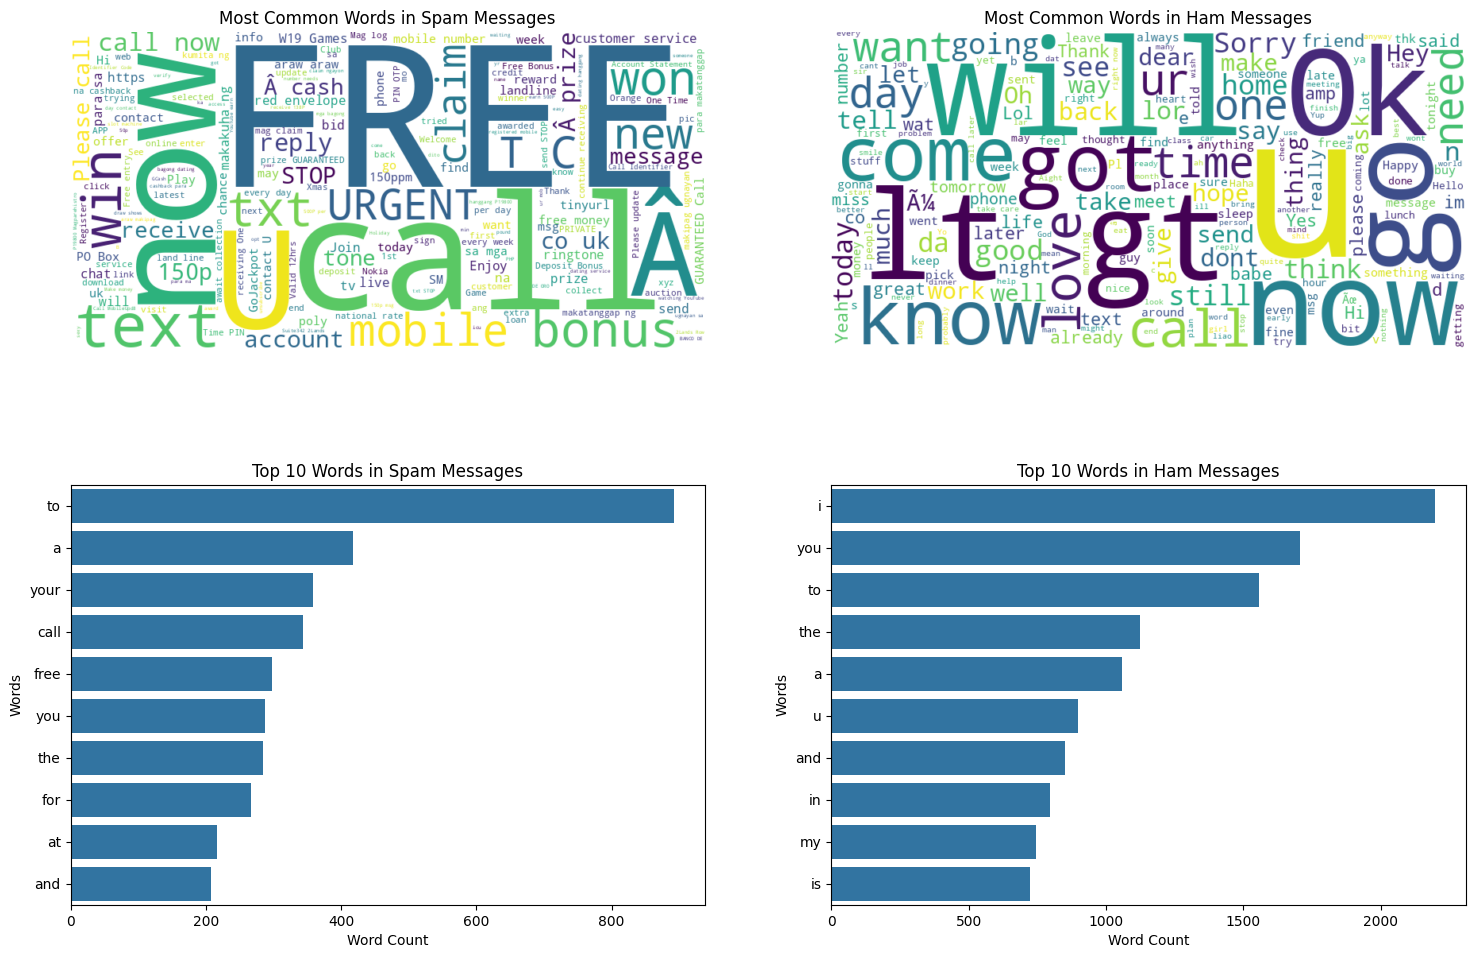

In [23]:
data['Category'] = data['Category'].astype('category')

def get_top_n_words(text_data, n=10):
    all_words = ' '.join(text_data).lower().split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

top_spam_words = get_top_n_words(data[data['Category'] == 'spam']['Text'])
top_ham_words = get_top_n_words(data[data['Category'] == 'ham']['Text'])

spam_words, spam_counts = zip(*top_spam_words)
ham_words, ham_counts = zip(*top_ham_words)

spam_words_str = ' '.join(data[data['Category'] == 'spam']['Text'])
ham_words_str = ' '.join(data[data['Category'] == 'ham']['Text'])

spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words_str)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words_str)

# Plot word clouds and top words
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Spam Messages')

plt.subplot(2, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Ham Messages')

plt.subplot(2, 2, 3)
sns.barplot(x=list(spam_counts), y=list(spam_words))
plt.title('Top 10 Words in Spam Messages')
plt.xlabel('Word Count')
plt.ylabel('Words')

plt.subplot(2, 2, 4)
sns.barplot(x=list(ham_counts), y=list(ham_words))
plt.title('Top 10 Words in Ham Messages')
plt.xlabel('Word Count')
plt.ylabel('Words')

plt.show()

### Word Frequency in Spam vs. Ham Messages
#### The word clouds highlight the most frequently occurring words in spam and ham messages:

##### 1. Spam Messages: Common words likely include promotional terms and phrases related to offers, prizes, or calls to action. Words such as Free, Call, Win, and Claim. 

##### 2. Ham Messages: Common words are more likely related to casual conversation or personal communication.